In [33]:
from HH_Laura import HouseholdSpecializationModelClass as HC
from types import SimpleNamespace
import numpy as np  
from scipy import optimize
import ipywidgets as widgets
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm

In [34]:
a = HC()

# a. Defining parameters

# Define parameters alpha = 0.25 and sigma = 0.5
a.par.alpha = 0.25
a.par.sigma = 0.5  
a_1 = a.solve_discrete()

HF_1 = a_1.HF
HM_1 = a_1.HM

HFHM_1=HF_1/HM_1

# Define parameters alpha = 0.25 and sigma = 1.0
a.par.alpha = 0.25
a.par.sigma = 1.0  
a_2 = a.solve_discrete()

HF_2 = a_2.HF
HM_2 = a_2.HM

HFHM_2=HF_2/HM_2

# Define parameters alpha = 0.25 and sigma = 1.5
a.par.alpha = 0.25
a.par.sigma = 1.5  
a_3 = a.solve_discrete()

HF_3 = a_3.HF
HM_3 = a_3.HM

HFHM_3=HF_3/HM_3

# Define parameters alpha = 0.5 and sigma = 0.5
a.par.alpha = 0.5
a.par.sigma = 0.5
a_4 = a.solve_discrete()

HF_4 = a_4.HF
HM_4 = a_4.HM

HFHM_4=HF_4/HM_4

# Define parameters alpha = 0.5 and sigma = 1.0
a.par.alpha = 0.5
a.par.sigma = 1.0  
a_5 = a.solve_discrete()

HF_5 = a_5.HF
HM_5 = a_5.HM

HFHM_5=HF_5/HM_5

# Define parameters alpha = 0.5 and sigma = 1.5
a.par.alpha = 0.5
a.par.sigma = 1.5 
a_6 = a.solve_discrete()

HF_6 = a_6.HF
HM_6 = a_6.HM

HFHM_6=HF_6/HM_6

# Define parameters alpha = 0.75 and sigma = 0.5
a.par.alpha = 0.75
a.par.sigma = 0.5  
a_7 = a.solve_discrete()

HF_7 = a_7.HF
HM_7 = a_7.HM

HFHM_7=HF_7/HM_7

# Define parameters alpha = 0.75 and sigma = 1.0
a.par.alpha = 0.75
a.par.sigma = 1.0  
a_8 = a.solve_discrete()

HF_8 = a_8.HF
HM_8 = a_8.HM

HFHM_8=HF_8/HM_8

# Define parameters alpha = 0.75 and sigma = 1.5
a.par.alpha = 0.75
a.par.sigma = 1.5  
a_9 = a.solve_discrete()

HF_9 = a_9.HF
HM_9 = a_9.HM

HFHM_9=HF_9/HM_9

/Users/lauragarcia/Desktop/MSc in Economics/Python/Intro_Num/HH_Laura.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**(power1)+par.alpha*HF**(power1))**(power2)
/Users/lauragarcia/Desktop/MSc in Economics/Python/Intro_Num/HH_Laura.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**(power1)+par.alpha*HF**(power1))**(power2)
/Users/lauragarcia/Desktop/MSc in Economics/Python/Intro_Num/HH_Laura.py:71: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


In [35]:
print(HFHM_1)

0.5454545454545454


In [36]:
print(HFHM_1)
print(HFHM_2)
print(HFHM_3)
print(HFHM_4)
print(HFHM_5)
print(HFHM_6)
print(HFHM_7)
print(HFHM_8)
print(HFHM_9)

0.5454545454545454
0.3076923076923077
0.21428571428571427
1.0
1.0
1.0
1.8333333333333333
3.25
4.666666666666667


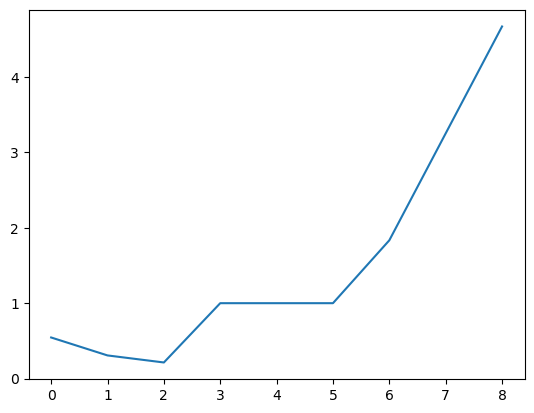

In [37]:
#define numpy array
x = np.array([HFHM_1, HFHM_2, HFHM_3, HFHM_4, HFHM_5, HFHM_6, HFHM_7, HFHM_8, HFHM_9]) 

plt.plot(x)

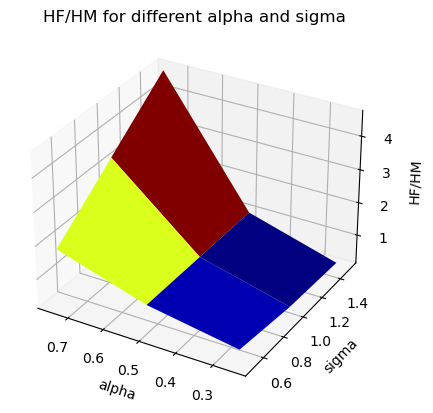

In [38]:
HFHM = np.array([HFHM_1, HFHM_2, HFHM_3, HFHM_4, HFHM_5, HFHM_6, HFHM_7, HFHM_8, HFHM_9]).reshape(3,3)
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha,sigma,HFHM,cmap=cm.jet)

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# c. invert xaxis
ax.invert_xaxis()

# d. add title
ax.set_title('HF/HM for different alpha and sigma')

plt.show()

### 2. Plot log HF/HM against log WF/WM for WF(0.8, 0.9, 1.0, 1.1, 1.2)

In [39]:
a.par.alpha = 0.5
a.par.sigma = 1

x = np.array([HFHM_1, HFHM_2, HFHM_3, HFHM_4, HFHM_5, HFHM_6, HFHM_7, HFHM_8, HFHM_9]) 

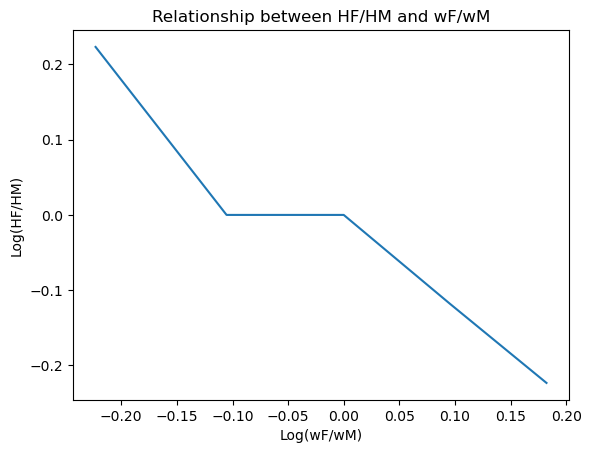

In [40]:
#np.linspace(0.8, 0.9, 1.0, 1.1, 1.2)
a.par.wF = a.par.wF_vec

# Values of wF
wF_values = np.linspace(0.8, 1.2, 5)

# Function to calculate HF/HM for a certain value of wF
def calc_HF_HM(wF):
    a.par.wF = wF

    # Solve model 
    opt = a.solve_discrete()

    # Return HF/HM
    return opt.HF / opt.HM

# Calculate result for diferent values of wF
HF_HM_values = [calc_HF_HM(wF) for wF in wF_values]

# Plot results
fig, ax = plt.subplots()
ax.plot(np.log(wF_values/ a.par.wM), np.log(HF_HM_values))
ax.set_xlabel('Log(wF/wM)')
ax.set_ylabel('Log(HF/HM)')
ax.set_title('Relationship between HF/HM and wF/wM')
plt.show()


### 3. Plot log HF/HM against log WF/WM for WF(0.8, 0.9, 1.9, 1.1, 1.2) assuming that the choice set is continuous.

In [41]:
# We first need to solve the model continuously "solve()" for each value of wF on the range. 
# We then modify the function "solve()"to solve the model for a given value of wF and return the ratio of female to male home production.
# Then, we can use a loop to iterate over the values of wF and store the results in two arrays, one for log(wF/wM) and the other for log(HF/HM).



In [42]:
result = a.solve_continuous()
print(result)


namespace(LM=3.080647988803684, HM=4.8380085191588424, LF=5.4781996680348435, HF=4.029462467658587)


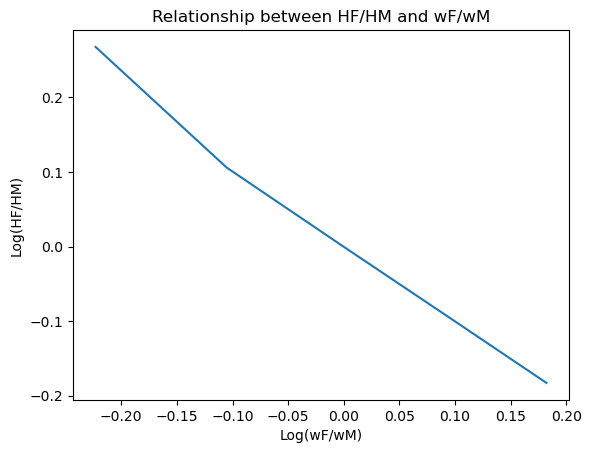

AttributeError: 'types.SimpleNamespace' object has no attribute 'beta0'

In [48]:
#np.linspace(0.8, 0.9, 1.0, 1.1, 1.2)
a.par.wF = a.par.wF_vec

# Values of wF
wF_values = np.linspace(0.8, 1.2, 5)

# Function to calculate HF/HM for a certain value of wF
def calc_HF_HM(wF):
    a.par.wF = wF

    # Solve model 
    opt = a.solve_continuous()

    # Return HF/HM
    return opt.HF / opt.HM

# Calculate result for diferent values of wF
HF_HM_values = [calc_HF_HM(wF) for wF in wF_values]

# Plot results
fig, ax = plt.subplots()
ax.plot(np.log(wF_values/ a.par.wM), np.log(HF_HM_values))
ax.set_xlabel('Log(wF/wM)')
ax.set_ylabel('Log(HF/HM)')
ax.set_title('Relationship between HF/HM and wF/wM')
plt.show()


### 4. Chose alpha and sigma such that minimizes (/Beta_0-/Betahat_0)**2-(/Beta_1-/Betahat_1)**2. Ilustrate how the model fit the data and discuss the economic interpretation of the results.

In [52]:
# define the values of wF and HM
a.par.wF = a.par.wF_vec
wF_values = np.linspace(0.8, 1.2, 5)
wM = 1

# define the values of HF and HM for each wF value
# HF_values = [a.solve_continuous(wF=wF, do_print=False).HF for wF in wF_values]
# HM_values = a.solve_continuous(wF=wM, do_print=False).HM

# Function to calculate HM for a certain value of wF
def calc_HM(wF):
    a.par.wF = wF

    # Solve model 
    opt = a.solve_continuous()

    # Return HF/HM
    return opt.HM

# Function to calculate HF for a certain value of wF
def calc_HF(wF):
    a.par.wF = wF

    # Solve model 
    opt = a.solve_continuous()

    # Return HF/HM
    return opt.HF

# calculate the log ratio y and x
y = np.log(calc_HM) - np.log(calc_HF)
x = np.log(wF_values) - np.log(wM)

# Function
def regression(x, y, beta0, beta1):
    y = beta0 + beta1 * x
    return (beta0, beta1)

# calculate beta1 and beta0
beta1 = np.cov(x, y)[0, 1] / np.var(x)
beta0 = np.mean(y) - beta1 * np.mean(x)

print(f"beta0 = {beta0}")
print(f"beta1 = {beta1}")


TypeError: solve_continuous() got an unexpected keyword argument 'wF'